In [152]:
import numpy as np
import networkx as nx
import igraph
import progressbar
from icecream import ic
import os
import time
import matplotlib.pyplot as plt
ic.configureOutput(prefix = 'debug | -> ')
ic.disable()
ic.enable()

## Entreno y evaluación de las redes con scale free networks

In [8]:
PATH_INSTANCES = './BRKGA/instances/scalefree/dimacs/'
NEW_PATH = "./BRKGA/instances/scalefree/txt/"

In [17]:
def Dimacs2Txt(ruta, nuevaruta):
    file1 = open(ruta, 'rb')
    Lines = file1.readlines()
    newname = ".".join((PATH_INSTANCES+file).split("/")[-1].split(".")[:-1])+".txt"
    file2 = open(nuevaruta+newname, 'w')
    c = 0
    for line in Lines[1:]:
        v = line.strip().split()
        file2.write(f"{int(v[1])-1} {int(v[2])-1}")
        file2.write('\n')
        c += 1
    file1.close()
    file2.close()
    print(f"para {newname} se escribieron {c} lines")
    return newname


In [18]:
Graphs = [graph for graph in os.listdir(PATH_INSTANCES)]
for file in progressbar.progressbar(Graphs):
    Dimacs2Txt(PATH_INSTANCES+file, NEW_PATH)

 15% (3 of 20) |###                      | Elapsed Time: 0:00:00 ETA:   0:00:00

para graph1__2.25_1000_10.txt se escribieron 10000 lines
para graph1__2.25_1000_20.txt se escribieron 20000 lines
para graph1__2.25_1000_30.txt se escribieron 30000 lines
para graph1__2.25_1000_5.txt se escribieron 5000 lines
para graph1__2.5_1000_10.txt se escribieron 10000 lines


 45% (9 of 20) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

para graph1__2.5_1000_20.txt se escribieron 20000 lines
para graph1__2.5_1000_30.txt se escribieron 30000 lines
para graph1__2.5_1000_5.txt se escribieron 5000 lines
para graph1__2.75_1000_10.txt se escribieron 10000 lines


 65% (13 of 20) |###############         | Elapsed Time: 0:00:00 ETA:   0:00:00

para graph1__2.75_1000_20.txt se escribieron 20000 lines
para graph1__2.75_1000_30.txt se escribieron 30000 lines
para graph1__2.75_1000_5.txt se escribieron 5000 lines
para graph1__2_1000_10.txt se escribieron 10000 lines


 85% (17 of 20) |####################    | Elapsed Time: 0:00:00 ETA:   0:00:00

para graph1__2_1000_20.txt se escribieron 20000 lines
para graph1__2_1000_30.txt se escribieron 30000 lines
para graph1__2_1000_5.txt se escribieron 5000 lines
para graph1__3_1000_10.txt se escribieron 10000 lines


100% (20 of 20) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


para graph1__3_1000_20.txt se escribieron 20000 lines
para graph1__3_1000_30.txt se escribieron 30000 lines
para graph1__3_1000_5.txt se escribieron 5000 lines


In [10]:
G = igraph.Graph.Read_Edgelist(NEW_PATH+'graph1__2.5_1000_5.txt', directed = False)

In [11]:
G

In [6]:
PATH_INSTANCES = './BRKGA/instances/erdos/dimacs/'
[graph for graph in os.listdir(PATH_INSTANCES)]

['ER_10000_10_0.dimacs',
 'ER_10000_10_1.dimacs',
 'ER_10000_15_0.dimacs',
 'ER_10000_15_1.dimacs',
 'ER_10000_20_0.dimacs',
 'ER_10000_20_1.dimacs',
 'ER_1000_10_0.dimacs',
 'ER_1000_10_1.dimacs',
 'ER_1000_10_2.dimacs',
 'ER_1000_10_3.dimacs',
 'ER_1000_15_0.dimacs',
 'ER_1000_15_1.dimacs',
 'ER_1000_15_2.dimacs',
 'ER_1000_15_3.dimacs',
 'ER_1000_20_0.dimacs',
 'ER_1000_20_1.dimacs',
 'ER_1000_20_2.dimacs',
 'ER_1000_20_3.dimacs',
 'ER_20000_10_0.dimacs',
 'ER_20000_10_1.dimacs',
 'ER_20000_15_0.dimacs',
 'ER_20000_15_1.dimacs',
 'ER_20000_20_0.dimacs',
 'ER_20000_20_1.dimacs',
 'ER_2000_10_0.dimacs',
 'ER_2000_10_1.dimacs',
 'ER_2000_10_2.dimacs',
 'ER_2000_10_3.dimacs',
 'ER_2000_15_0.dimacs',
 'ER_2000_15_1.dimacs',
 'ER_2000_15_2.dimacs',
 'ER_2000_15_3.dimacs',
 'ER_2000_20_0.dimacs',
 'ER_2000_20_1.dimacs',
 'ER_2000_20_2.dimacs',
 'ER_2000_20_3.dimacs',
 'ER_30000_10_0.dimacs',
 'ER_30000_15_0.dimacs',
 'ER_30000_20_0.dimacs',
 'ER_50000_10_0.dimacs',
 'ER_50000_15_0.dimacs',

## Análizando características topológicas de las redes en las soluciones óptimas

In [182]:
PATH = './BRKGA/instances/Erdos/train/txt/ER_1000_10_0.txt'
G = igraph.Graph.Read_Edgelist(PATH, directed = False)
G = G.to_networkx()

PATH_OP = './BRKGA/instances/Erdos/train/optimal/ER_1000_10_0.dimacs'
solucion = []
with open(PATH_OP) as f:
    for line in f.readlines():
        solucion.append(int(line.replace("\n", "")))


In [172]:
print(f"Tamaño de la solución: {len(solucion)}")

Tamaño de la solución: 773


In [183]:
BC = np.array(list(nx.betweenness_centrality(G, k = 500).values()))
CC = np.array(list(nx.closeness_centrality(G).values()))
LC = np.array(list(nx.load_centrality(G).values()))
DG = np.array(list(nx.degree(G))).T[1]

In [189]:
DG = np.array(list(nx.degree(G))).T[1]

PR = np.array(list(nx.pagerank(G).values()))

features = [BC, PR, DG, CC, LC]
names = ["BC", "PageRank", "degree", "closeness_centrality", "LC"]

In [178]:
k = len(solucion)
for topo_feature, name in zip(features, names):
    
    TOP = np.argpartition(topo_feature, -k)[-k:]

    print( f" El {len(np.intersect1d(solucion, TOP)) / k :.2f} de los elementos para {name} se encuentran en la solución" )

 El 0.65 de los elementos para BC se encuentran en la solución
 El 0.85 de los elementos para PageRank se encuentran en la solución
 El 0.84 de los elementos para degree se encuentran en la solución
 El 0.74 de los elementos para closeness_centrality se encuentran en la solución
 El 0.84 de los elementos para LC se encuentran en la solución


In [180]:
Mask = np.zeros(G.number_of_nodes())
Mask[solucion] = 1

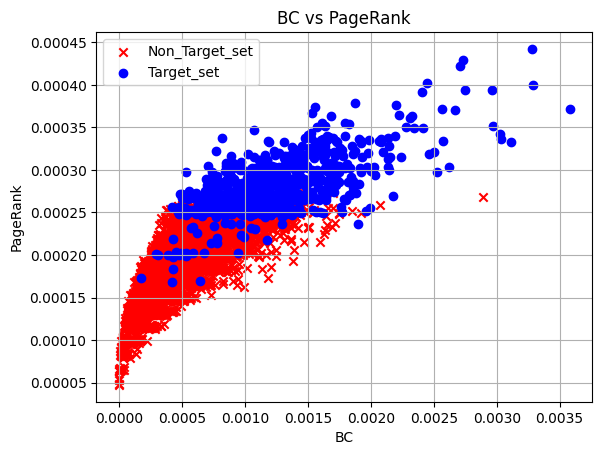

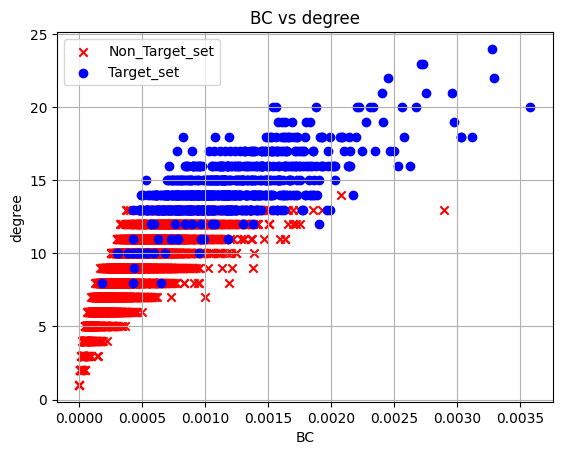

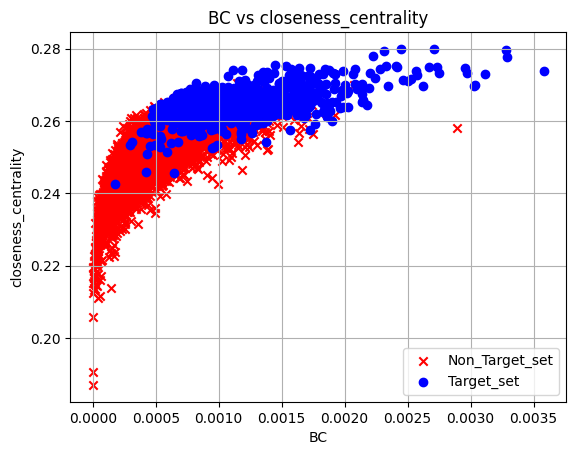

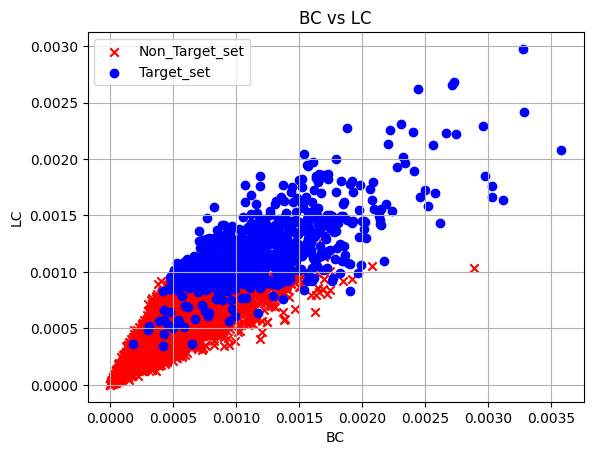

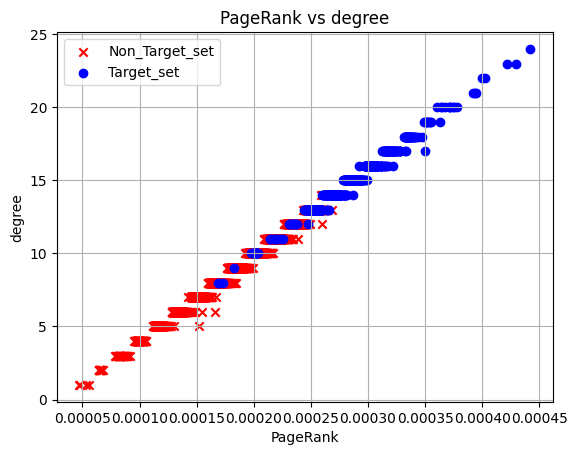

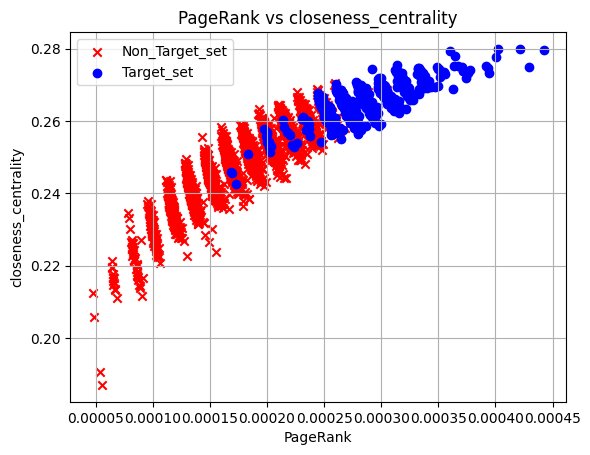

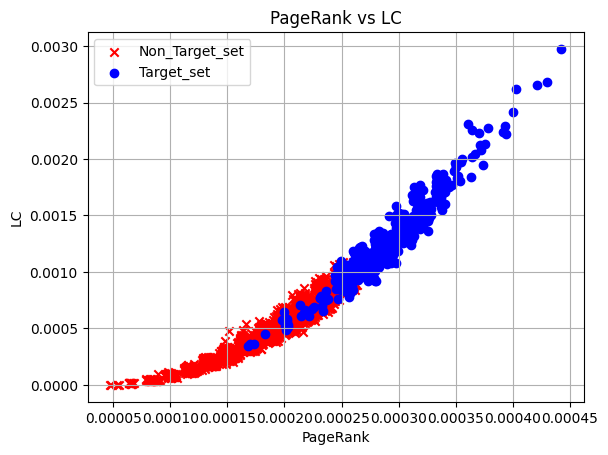

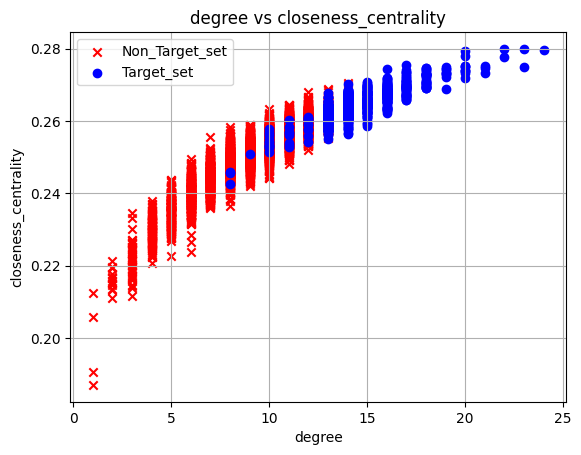

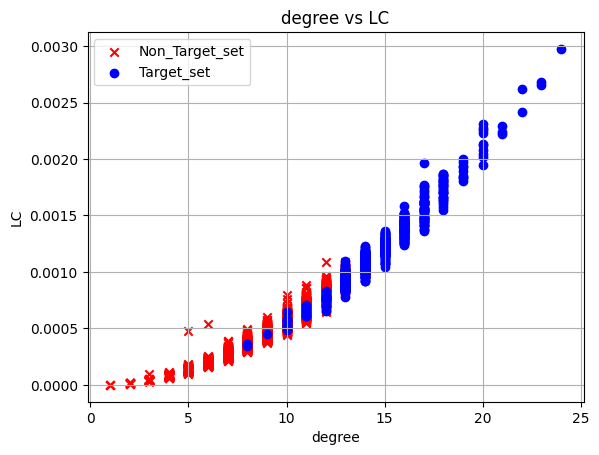

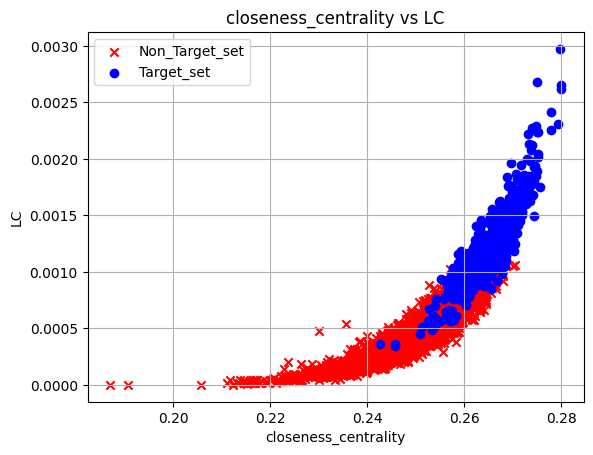

In [181]:
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        if i == j:
            continue
        plt.scatter( features[i][Mask == 0], features[j][Mask == 0] , color = 'red', marker = 'x', label = 'Non_Target_set')
        plt.scatter( features[i][Mask == 1], features[j][Mask == 1] , color = 'blue', marker = 'o', label = 'Target_set')
        
        plt.title(f"{names[i]} vs {names[j]}")
        plt.xlabel(names[i])
        plt.ylabel(names[j])
        plt.grid()
        plt.legend()
        plt.show()

In [ ]:
# Calcular todas las features para cada grafo y guardarlas para que el entrenamiento no lleve tiempo de más
# poner el tiempo que tardó en la parte de arriba algo como
# n: 5000, time: 90s, 

## Calculando para los grafos

In [226]:
def getFeatures(G):
    
    BC = np.array(list(nx.betweenness_centrality(G, k = 500).values()))
    CC = np.array(list(nx.closeness_centrality(G).values()))
    LC = np.array(list(nx.load_centrality(G).values()))
    DG = np.array(list(nx.degree(G))).T[1]
    PR = np.array(list(nx.pagerank(G).values()))

    features = [BC, PR, DG, CC, LC]
    names = ["BC", "PageRank", "degree", "closeness_centrality", "LC"]
    return np.array(features).T, names

In [227]:
def writeFeatures(PATH, ins, features, elapsed):
    subfij = '_feat'
    file2 = open(PATH + ins.split(".")[0] + subfij + ".txt", 'w')
    c = 0
    
    file2.write(f"time: {elapsed}, n: {features.shape[0]}")
    file2.write('\n')
    
    for f in features:
        st = str(f).replace("\n", "").replace("[", "").replace("]", "").replace(" ", ",")
        file2.write(st)
        file2.write('\n')
        c += 1
    file2.close()
    print(f"para {ins} se escribieron {c} lines")

In [231]:
PATH = './BRKGA/instances/Erdos/train/txt/'
PATH_save = './BRKGA/instances/Erdos/train/feats/'

graphs = [graph for graph in os.listdir(PATH)]

Graphs = []
for ins in graphs:
    G = igraph.Graph.Read_Edgelist(PATH+ins, directed = False)
    G = G.to_networkx()
    Graphs.append(G)

In [229]:
c = 0
for G, ins in zip(Graphs, graphs):
    c+=1
    print(f"\n------------ {c} out of {len(Graphs)} ------------\n")
    print(f"\nNext graph: {ins}")
    
    s = time.time()
    features, _ = getFeatures(G)
    elapsed = time.time() - s
    print(f"\nTime elapsed: {elapsed:.3f}")
    
    writeFeatures(PATH_save, ins, features, elapsed)
    


------------ 1 out of 36 ------------


Next graph: ER_1000_10_0.txt

Time elapsed: 7.376
para ER_1000_10_0.txt se escribieron 1000 lines

------------ 2 out of 36 ------------


Next graph: ER_1000_10_1.txt

Time elapsed: 7.872
para ER_1000_10_1.txt se escribieron 1000 lines

------------ 3 out of 36 ------------


Next graph: ER_1000_10_2.txt


KeyboardInterrupt: 

In [204]:
for f in features:
    print(f)
    break

[4.05108700e-03 1.13179135e-03 1.10000000e+01 3.09000928e-01
 2.98765320e-03]


In [218]:
float(str(f).replace("\n", "").replace("[", "").replace("]", "").replace(" ", ",").split(",")[0])

0.0018982196

In [213]:
PATH#.split(".")[0] + subfij + ".txt"

'./BRKGA/instances/Erdos/train/txt/ER_1000_10_0.txt'

In [ ]:
def Dimacs2Txt(ruta, name, features):
    file1 = open(ruta, 'rb')
    Lines = file1.readlines()
    newname = ".".join((PATH_INSTANCES+file).split("/")[-1].split(".")[:-1])+".txt"
    file2 = open(nuevaruta+newname, 'w')
    c = 0
    for line in Lines[1:]:
        v = line.strip().split()
        file2.write(f"{int(v[1])-1} {int(v[2])-1}")
        file2.write('\n')
        c += 1
    file1.close()
    file2.close()
    print(f"para {newname} se escribieron {c} lines")
    return newname